In [27]:
import torch as t
from torch.autograd import Variable as V
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [24]:
t.manual_seed(10000)

def get_fake_data(batch_size=8):
    x=t.rand(batch_size,1)*20
    y=x*2+(1+t.randn(batch_size,1))*3
    return x,y

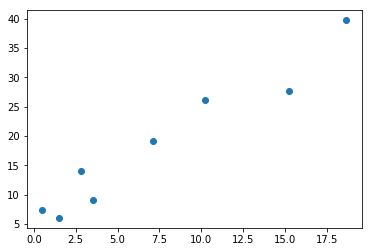

In [42]:
x,y=get_fake_data()
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())

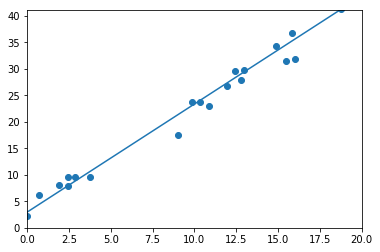

Variable containing:
 2.0469
[torch.FloatTensor of size 1]
 Variable containing:
 2.9621
[torch.FloatTensor of size 1]



In [43]:
w=V(t.rand(1,1),requires_grad=True)
b=V(t.zeros(1,1),requires_grad=True) 
lr=0.001
for ii in range(8000):
    x,y=get_fake_data()
    x,y=V(x),V(y)
    y_pred=x.mm(w)+b.expand_as(y)
    loss=0.5*(y_pred-y)**2
    loss=loss.sum()
    loss.backward()
    w.data.sub_(lr*w.grad.data)
    b.data.sub_(lr*b.grad.data)
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii%1000==0:
        display.clear_output(wait=True)
        x=t.arange(0,20).view(-1,1)
        y=x.mm(w.data)+b.data.expand_as(x)
        plt.plot(x.numpy(),y.numpy())
        
          
        x2,y2=get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(),y2.numpy())
        
        plt.xlim(0,20)
        plt.ylim(0,41)
        plt.show()
        plt.pause(0.5)
print(w.squeeze()[0],b.squeeze()[0])
        
    
    
    